<a href="https://colab.research.google.com/github/manojgupta3051994/Data-Science-Hackathon-And-Competition/blob/master/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [5]:
data = pd.read_csv('train.csv')
data.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [6]:
data.shape

(7274, 3)

In [8]:
data['sentiment'].value_counts()

1    4311
2    2382
0     456
3     125
Name: sentiment, dtype: int64

In [49]:
data.isnull().sum()

tweet_id     0
tweet        1
sentiment    0
dtype: int64

In [50]:
data.dropna(inplace=True)

In [51]:
# function to remove user handles
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)

    return input_txt

In [52]:
data['length_of_tweets'] = [len(t) for t in data.tweet]

In [53]:
data.head()

,tweet_id,tweet,sentiment,length_of_tweets
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,89
1,1851,Learning ab Google doodles! All doodles should...,1,143
2,2689,one of the most in-your-face ex. of stealing t...,2,132
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,125
4,3604,Line outside the Apple store in Austin waiting...,1,77


In [54]:
data['tweet'] = data['tweet'].str.lower()

In [55]:
data.head()

,tweet_id,tweet,sentiment,length_of_tweets
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,89
1,1851,learning ab google doodles! all doodles should...,1,143
2,2689,one of the most in-your-face ex. of stealing t...,2,132
3,4525,this iphone #sxsw app would b pretty awesome i...,0,125
4,3604,line outside the apple store in austin waiting...,1,77


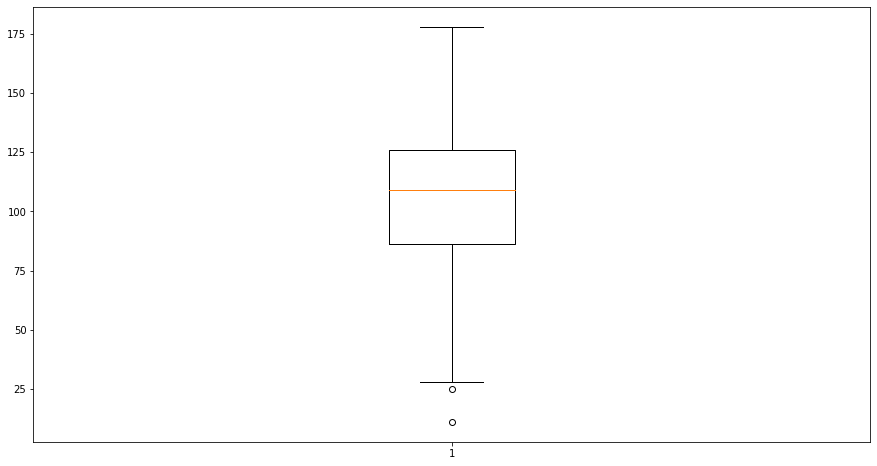

In [56]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.boxplot(data.length_of_tweets)
plt.show()

In [57]:
data['tweet'][54]

'&lt;just a rumor...&gt; rt @mention google to launch major new social network called circles, possibly today {link} #sxsw'

In [58]:
#trying out the library
example1 = BeautifulSoup(data['tweet'][54], 'lxml').get_text()
print(example1)

<just a rumor...> rt @mention google to launch major new social network called circles, possibly today {link} #sxsw


In [59]:
#using the library on the dataframe
data['tweet'] = data['tweet'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

In [60]:
data['tweet'][54]

'<just a rumor...> rt @mention google to launch major new social network called circles, possibly today {link} #sxsw'

In [61]:
data['tweet'][10]

'rt @mention official #sxsw app \x89û÷sxsw go\x89ûª bit.ly/hmiiga #android #iphone #ipad'

In [62]:
#removing user handles
data['tweet'] = data['tweet'].apply(lambda row:remove_pattern(row, "@[\w]*"))

In [63]:
data['tweet'][10]

'rt  official #sxsw app \x89û÷sxsw go\x89ûª bit.ly/hmiiga #android #iphone #ipad'

In [64]:
data['tweet'][2967]

'retrollect is now also in android market! #sxsw https://market.android.com/details?id=com.borderstylo.retrollect'

In [65]:
data.to_csv('new_train.csv', index=False)

In [66]:
def identify_urls(tweet):
    """
    This is a function that will search for URLs withing a string. It returns the URL part if there is any or it will
    return 'No URL'
    """
    
    regex = r'('

    # Scheme (HTTP, HTTPS, FTP and SFTP):
    regex += r'(?:(https?|s?ftp):\/\/)?'

    # www:
    regex += r'(?:www\.)?'

    regex += r'('

    # Host and domain (including ccSLD):
    regex += r'(?:(?:[A-Z0-9][A-Z0-9-]{0,61}[A-Z0-9]\.)+)'

    # TLD:
    regex += r'([A-Z]{2,6})'

    # IP Address:
    regex += r'|(?:\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})'

    regex += r')'

    # Port:
    regex += r'(?::(\d{1,5}))?'

    # Query path:
    regex += r'(?:(\/\S+)*)'

    regex += r')'
    
    #searching for URLs in the tweet
    find_urls_in_string = re.compile(regex, re.IGNORECASE)
    url = find_urls_in_string.search(tweet)
    
    if url is not None and url.group(0) is not None:
        return url.group(0).strip()
    else:
        return "No URL"

In [67]:
data['URL'] = data['tweet'].apply(lambda x: identify_urls(x))

In [68]:
data['URL'].value_counts()

No URL                                                         7142
webdoc.com                                                        8
bit.ly/g03mzb                                                     8
rww.to/f6bcet                                                     5
actsofsharing.com                                                 5
                                                               ... 
bit.ly/androidhig                                                 1
spin.com                                                          1
vid.camera                                                        1
bit.ly/ajs2011                                                    1
http://itunes.apple.com/us/app/holler-gram/id420666439?mt=8       1
Name: URL, Length: 92, dtype: int64

In [69]:
data['tweet']  = data['tweet'].replace(r'http\S+', '', regex=True).replace(r'https\S+', '', regex=True).replace(r'www\S+', '', regex=True)

In [70]:
data['tweet'][2967]

'retrollect is now also in android market! #sxsw '

In [71]:
data['tweet']  = data['tweet'].apply(lambda x: re.sub(r'((www\.[\S]+)|(https?://[\S]+))', ' URL ', x))

In [72]:
data['tweet'][2967]


'retrollect is now also in android market! #sxsw '

In [73]:
stop_words = list(set(stopwords.words('english')))+list(punctuation)+['``', "'s", "...", "n't"]

In [74]:
data['tweet'][87]

"rt  any ipad2's left at the apple store at #sxsw? anyone know? :)"

In [75]:
def handle_emojis(tweet):
    """
    In this method we are converting the emojis with the text they represent. 
    Happy emojis are converted to EMO_POS and negative to EMO_NEG.
    """
    # Smile -- :), : ), :-), (:, ( :, (-:, :')
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' smiling ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' laughing ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' love ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;)', ' wink ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' sad ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' cry ', tweet)
    
    return tweet

In [76]:
data['tweet'] = data['tweet'].apply(lambda x: handle_emojis(x))

In [77]:
data['tweet'][87]

"rt  any ipad2's left at the apple store at #sxsw? anyone know?  smiling "

In [78]:
data['tweet'][1251]

' gr8 meeting u irl after the book signing today! really enjoyed your ipad prez & mahalo for the autograph! #sxsw #hisxsw'

In [79]:
#converting to full meaningful words
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"ab": "about",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"mkt": "market",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"yrs": "years",
"ym": "young man",
"gr8": "great"
}

In [80]:
def dict_words(text, dictionary):
    """
    Method to replace a word with a word from the dictionary.
    The dictionary will have the word to be replaced as key and the new word as value
    """
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
                print("Old: "+word)
                print("New: "+text)
    return text

In [81]:
text = "gr8 meeting u irl after the book signing today! really enjoyed your ipad prez & mahalo for the autograph! #sxsw #hisxsw"

newtext = dict_words(text, short_word_dict)
print("New text: " + newtext)

Old: gr8
New: great meeting u irl after the book signing today! really enjoyed your ipad prez & mahalo for the autograph! #sxsw #hisxsw
Old: u
New: great meeting you irl after the book signing today! really enjoyed yoyour ipad prez & mahalo for the ayoutograph! #sxsw #hisxsw
Old: irl
New: great meeting you in real life after the book signing today! really enjoyed yoyour ipad prez & mahalo for the ayoutograph! #sxsw #hisxsw
New text: great meeting you in real life after the book signing today! really enjoyed yoyour ipad prez & mahalo for the ayoutograph! #sxsw #hisxsw


In [82]:
data['tweet'] = data['tweet'].replace('[...…]','').str.split().apply(lambda x: ' '.join([short_word_dict.get(e, e) for e in x]))

In [83]:
data['tweet'][1251]

'great meeting you in real life after the book signing today! really enjoyed your ipad prez & mahalo for the autograph! #sxsw #hisxsw'

In [84]:
data['tweet'][2121]

"why should/shouldn't i get an ipad 2? discuss smiling #sxsw"

In [85]:
#pre-precessing function
def preprocess_text(data, col_name):
    
    #converting string to lower case
    data[col_name] = data[col_name].str.lower()
    
    #remove user handles
    data[col_name] = data[col_name].apply(lambda row:remove_pattern(row, "@[\w]*"))
    
    #converting html characters to strings
    data[col_name] = data[col_name].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())
    
    #converting emojis to the string they represent
    data[col_name] = data[col_name].apply(lambda x: handle_emojis(x))
    
    #removing URLs from the tweets
    data[col_name]  = data[col_name].apply(lambda x: re.sub(r'((www\.[\S]+)|(https?://[\S]+))', ' URL ', x))
    
    #converting abbreviations to their full forms
    data[col_name] = data[col_name].replace('[...…]','').str.split().apply(lambda x: ' '.join([short_word_dict.get(e, e) for e in x]))
    
    # Remove single space remaining at the front of the tweet.
    data[col_name] = data[col_name].apply(lambda x: x.lstrip(' '))
    
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    data[col_name] = data[col_name].apply(lambda x: ''.join(c for c in x if c <= '\uFFFF'))
    
    #removing non-ASCII characters
    data[col_name] = data[col_name].apply(lambda x: ''.join([i if ord(i) < 128 else ' ' for i in x]))
    
    # Remove words with 2 or fewer letters
    data[col_name] = data[col_name].apply(lambda x: re.sub(r'\b\w{1,2}\b', '', x))
    
    # Convert more than 2 letter repetitions to 2 letter
    # funnnnny --> funny
    data[col_name] = data[col_name].apply(lambda x: re.sub(r'(.)\1+', r'\1\1', x))
    
    #tokenizing data
    data[col_name] = data[col_name].apply(lambda x: nltk.word_tokenize(x))
    
    #stopwords removal
    stop_words = list(set(stopwords.words('english')))+list(punctuation)+['``', "'s", "...", "n't", "'re", "''"]
    stop_words = list(punctuation)+['``', "'s", "...", "n't", "'re", "''"]
    data[col_name] = data[col_name].apply(lambda row: [word for word in row if word not in stop_words])
    
#     # stemming words
#    stemmer = PorterStemmer()
#    data[col_name] = data[col_name].apply(lambda x: [stemmer.stem(i) for i in x])

    #lemmatization
    lemmatizer = WordNetLemmatizer()
    data[col_name] = data[col_name].apply(lambda x: [lemmatizer.lemmatize(i) for i in x])

    
    data[col_name] = data[col_name].apply(lambda x: ' '.join(x))
    
    return data

In [86]:
raw_data = pd.read_csv('train.csv')
raw_data.dropna(inplace=True)

In [87]:
processed_data = preprocess_text(raw_data, 'tweet')

In [88]:
processed_data.to_csv('train_withstop.csv', index=False)

In [89]:
processed_data.head(20)

,tweet_id,tweet,sentiment
0,1701,sxswnui sxsw apple defining language touch wit...,1
1,1851,learning about google doodle all doodle should...,1
2,2689,one the most -your-face stealing the show year...,2
3,4525,this iphone sxsw app would pretty awesome didn...,0
4,3604,line outside the apple store austin waiting fo...,1
5,966,technews one lone dude awaits ipad apple sxsw ...,1
6,1395,sxsw tip prince npr video toy shopping with zu...,1
7,8182,user new ubersocial for iphone now the app sto...,1
8,8835,free sxsw sampler itunes link freemusic,2
9,883,think might all weekend without seeing the sam...,2


In [90]:
test_data = pd.read_csv('test.csv')
test_data.head()

,tweet_id,tweet
0,7506,Audience Q: What prototyping tools do you use?...
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...
2,247,@mention and here's a pic of you winning your...
3,7688,Google Marissa Mayer: mobile phone as a cursor...
4,3294,#SXSW Google maps is even cooler than I thought


In [91]:
test_data.shape

(1819, 2)

In [92]:
test_processed = preprocess_text(test_data, 'tweet')
test_processed.to_csv('test_withstop.csv', index=False)
test_processed.head()

,tweet_id,tweet
0,7506,audience what prototyping tool you use sketchb...
1,7992,sxsw send your best photo video .. link citize...
2,247,and here pic you winning your ipad unsix sxsw ...
3,7688,google marissa mayer mobile phone cursor physi...
4,3294,sxsw google map even cooler than thought


In [131]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from scipy.sparse import coo_matrix, hstack
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [132]:
data = processed_data
data.head()

,tweet_id,tweet,sentiment
0,1701,sxswnui sxsw apple defining language touch wit...,1
1,1851,learning about google doodle all doodle should...,1
2,2689,one the most -your-face stealing the show year...,2
3,4525,this iphone sxsw app would pretty awesome didn...,0
4,3604,line outside the apple store austin waiting fo...,1


In [133]:
data.dropna(inplace=True)

In [129]:
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(data['tweet'])

In [134]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['tweet'])

In [135]:
X.shape

(7273, 7843)

In [136]:
lr_model = LogisticRegression()
lr_model.fit(X, data['sentiment'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:
test_data = test_processed
test_data.head()

,tweet_id,tweet
0,7506,audience what prototyping tool you use sketchb...
1,7992,sxsw send your best photo video .. link citize...
2,247,and here pic you winning your ipad unsix sxsw ...
3,7688,google marissa mayer mobile phone cursor physi...
4,3294,sxsw google map even cooler than thought


In [138]:
X_test = tfidf_vectorizer.transform(test_data['tweet'])

In [139]:
X_test.shape

(1819, 7843)

In [103]:
lr_pred = lr_model.predict(X_test)

In [104]:
to_submit = pd.DataFrame({'tweet_id': test_data['tweet_id'], 'sentiment': lr_pred})
to_submit.to_csv('lr_cv_withstop.csv', index=False)
to_submit.head()

,tweet_id,sentiment
0,7506,1
1,7992,1
2,247,1
3,7688,2
4,3294,2


In [105]:
to_submit['sentiment'].value_counts()

1    1349
2     455
0      15
Name: sentiment, dtype: int64

In [106]:
X = X.toarray()
X_test = X_test.toarray()

In [107]:
gnb = GaussianNB()
gnb_pred = gnb.fit(X, data['sentiment']).predict(X_test)
gnb_pred

array([1, 1, 2, ..., 0, 1, 1])

In [108]:
to_submit = pd.DataFrame({'tweet_id': test_data['tweet_id'], 'sentiment': gnb_pred})
to_submit.to_csv('gnb_pred.csv', index=False)
to_submit.head()

,tweet_id,sentiment
0,7506,1
1,7992,1
2,247,2
3,7688,2
4,3294,2


In [109]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(X, data['sentiment'])
dt_pred = dtree.predict(X_test)
to_submit = pd.DataFrame({'tweet_id': test_data['tweet_id'], 'sentiment': dt_pred})
to_submit.to_csv('dtree_pred.csv', index=False)
to_submit.head()

,tweet_id,sentiment
0,7506,1
1,7992,1
2,247,1
3,7688,3
4,3294,2


In [110]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, data['sentiment'])
rf_pred = rf_model.predict(X_test)
to_submit = pd.DataFrame({'tweet_id': test_data['tweet_id'], 'sentiment': rf_pred})
to_submit.to_csv('rf_pred.csv', index=False)
to_submit.head()

,tweet_id,sentiment
0,7506,1
1,7992,1
2,247,1
3,7688,2
4,3294,2


In [111]:
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

     |████████████████████████████████| 65.8MB 55kB/s 


In [112]:
processed_train = processed_data
processed_train.dropna(inplace=True)

In [113]:
test_data = test_processed

In [114]:
count_vectorizer = CountVectorizer()
X_train = count_vectorizer.fit_transform(processed_train['tweet'])

In [115]:
X_train.shape

(7273, 7843)

In [116]:
X_test = count_vectorizer.transform(test_data['tweet'])

In [117]:
X_test.shape

(1819, 7843)

In [118]:
from sklearn.metrics import f1_score, make_scorer

f1 = make_scorer(f1_score , average='macro')

In [ ]:

xgb = XGBClassifier()

optimization_dict = {'max_depth': [2,3,4,5,6,7],
                     'n_estimators': [50,60,70,80,90,100,150,200]}

model = GridSearchCV(xgb, optimization_dict, 
                     scoring=f1, verbose=5)
model.fit(X_train, processed_train['sentiment'])

In [120]:
print(model.best_score_)
print(model.best_params_)

0.37079999872460934
{'max_depth': 7, 'n_estimators': 200}


In [121]:
grid_pred = model.predict(X_test)

In [122]:

to_submit = pd.DataFrame({'tweet_id': test_data['tweet_id'], 'sentiment': grid_pred})
to_submit.to_csv('grid_pred.csv', index=False)
to_submit.head()

,tweet_id,sentiment
0,7506,1
1,7992,1
2,247,1
3,7688,2
4,3294,1


In [123]:
xgb.fit(X_train, processed_train['sentiment'])
xgb_pred = xgb.predict(X_test)

In [124]:
to_submit = pd.DataFrame({'tweet_id': test_data['tweet_id'], 'sentiment': xgb_pred})
to_submit.to_csv('xgb_pred.csv', index=False)
to_submit.head()

,tweet_id,sentiment
0,7506,1
1,7992,1
2,247,1
3,7688,1
4,3294,1


In [125]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb_pred = mnb.fit(X_train, processed_train['sentiment']).predict(X_test)
to_submit = pd.DataFrame({'tweet_id': test_data['tweet_id'], 'sentiment': mnb_pred})
to_submit.to_csv('mnb_pred.csv', index=False)
to_submit.head()

,tweet_id,sentiment
0,7506,1
1,7992,1
2,247,1
3,7688,2
4,3294,2


In [242]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from sklearn.svm import LinearSVC

In [243]:
pipeline_sgd = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('nb', SGDClassifier()),
])

In [244]:
processed_train['sentiment'].value_counts()

1    4310
2    2382
0     456
3     125
Name: sentiment, dtype: int64

In [235]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(processed_train['tweet'])

In [245]:
count_vectorizer = CountVectorizer(ngram_range=(1, 3))
X = count_vectorizer.fit_transform(processed_train['tweet'])

In [246]:
X.shape

(7273, 97074)

In [219]:
ros = RandomOverSampler(random_state=3)
data_res, label_res = ros.fit_sample(X, processed_train['sentiment'])

In [247]:
smt = SMOTE(random_state=777, k_neighbors=1)
data_res, label_res = smt.fit_sample(X, processed_train['sentiment'])

In [248]:
data_res.shape

(17240, 97074)

In [249]:
label_res.shape

(17240,)

In [250]:
X_test = count_vectorizer.transform(test_data['tweet'])

In [251]:
X_test.shape

(1819, 97074)

In [195]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=7600)
lr_model.fit(data_res, label_res)
lr_pred = lr_model.predict(X_test)

In [230]:
svc = LinearSVC(penalty='l2', C=0.5, dual=False, random_state=0, max_iter=1000)
svc.fit(X, processed_train['sentiment'])
svc_pred = svc.predict(X_test)
svc_pred

array([1, 1, 1, ..., 2, 2, 1])

In [196]:
to_submit = pd.DataFrame({'tweet_id': test_data['tweet_id'], 'sentiment': lr_pred})
to_submit.to_csv('lat.csv', index=False)
to_submit.head()

,tweet_id,sentiment
0,7506,1
1,7992,3
2,247,1
3,7688,2
4,3294,2


In [231]:
to_submit = pd.DataFrame({'tweet_id': test_data['tweet_id'], 'sentiment': svc_pred})
to_submit.to_csv('svc_Smote.csv', index=False)
to_submit.head()

,tweet_id,sentiment
0,7506,1
1,7992,1
2,247,1
3,7688,2
4,3294,1


In [252]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(data_res, label_res)
rf_pred = rf_model.predict(X_test)
to_submit = pd.DataFrame({'tweet_id': test_data['tweet_id'], 'sentiment': rf_pred})
to_submit.to_csv('rf_pred_smote.csv', index=False)
to_submit.head()

,tweet_id,sentiment
0,7506,1
1,7992,1
2,247,1
3,7688,1
4,3294,2


In [258]:
def perform_cv(model, X, y):
    f1_scores = []
    X_t, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    model.fit(X_t, y_train)
    model_pred = model.predict(X_test)
    print(classification_report(y_test, model_pred))
    f1 = f1_score(y_test, model_pred,average="weighted")
    print("F1 score: "+str(f1))
    f1_scores.append(f1)
    return f1_scores

In [261]:
from sklearn.metrics import classification_report, f1_score

In [262]:
f1_scores = perform_cv(rf_model, data_res, label_res)

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1417
           1       0.72      0.61      0.66      1435
           2       0.64      0.55      0.59      1411
           3       0.69      0.97      0.81      1427

    accuracy                           0.72      5690
   macro avg       0.72      0.72      0.71      5690
weighted avg       0.72      0.72      0.71      5690

F1 score: 0.7100074556498477


In [264]:
import numpy as np

In [265]:
np.mean(f1_scores)

0.7100074556498477

In [266]:
f1_scores = perform_cv(xgb, data_res, label_res)

              precision    recall  f1-score   support

           0       0.96      0.80      0.87      1372
           1       0.60      0.90      0.72      1387
           2       0.78      0.54      0.63      1440
           3       0.99      0.97      0.98      1491

    accuracy                           0.80      5690
   macro avg       0.83      0.80      0.80      5690
weighted avg       0.83      0.80      0.80      5690

F1 score: 0.8035565877423705


In [267]:
np.mean(f1_scores)

0.8035565877423705

In [ ]:
xgb = XGBClassifier()

optimization_dict = {'max_depth': [2,3,4,5,6,7],
                     'n_estimators': [50,60,70,80,90,100,150,200]}

model = GridSearchCV(xgb, optimization_dict, 
                     scoring=f1, verbose=5)
model.fit(data_res, label_res)

In [257]:
print(model.best_score_)
print(model.best_params_)

AttributeError: ignored

In [ ]:
grid_pred = model.predict(X_test)

In [ ]:
to_submit = pd.DataFrame({'tweet_id': test_data['tweet_id'], 'sentiment': grid_pred})
to_submit.to_csv('grid_pred_smote.csv', index=False)
to_submit.head()

,tweet_id,sentiment
0,7506,1
1,7992,1
2,247,1
3,7688,2
4,3294,1


In [ ]:
xgb.fit(data_res, label_res)
xgb_pred = xgb.predict(X_test)

In [ ]:
to_submit = pd.DataFrame({'tweet_id': test_data['tweet_id'], 'sentiment': xgb_pred})
to_submit.to_csv('xgb_pred_smote.csv', index=False)
to_submit.head()

,tweet_id,sentiment
0,7506,1
1,7992,1
2,247,1
3,7688,1
4,3294,1
